In [154]:
pip install plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\hi! SONY\Desktop\smartphones.csv')
print('sucessfully loaded csv file')

sucessfully loaded csv file


EDA(EXPLORATARY DATA ANALYSIS)

In [6]:
df.shape

(1816, 8)

In [4]:
df.head()


,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [7]:
df.info

<bound method DataFrame.info of                                             Smartphone     Brand  \
0                   Realme C55 8/256GB Sunshower Libre    Realme   
1             Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung   
2         Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola   
3             Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi   
4              Nothing Phone (2) 12/512GB Blanco Libre   Nothing   
...                                                ...       ...   
1811             Xiaomi Redmi Note 8 4/64GB Azul Libre    Xiaomi   
1812   Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre    Xiaomi   
1813          Xiaomi Redmi Note 9 4/128GB Blanco Libre    Xiaomi   
1814   Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre    Xiaomi   
1815  Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre    Xiaomi   

               Model   RAM  Storage   Color Free  Final Price  
0                C55   8.0    256.0  Yellow  Yes       231.60  
1         Galaxy M23   

In [11]:
df.describe(include='all')

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
count,1816,1816,1816,1333.00000,1791.000000,1816,1816,1816.000000
unique,1816,37,383,NaN,NaN,17,2,NaN
top,Realme C55 8/256GB Sunshower Libre,Samsung,iPhone 13,NaN,NaN,Black,Yes,NaN
freq,1,458,60,NaN,NaN,537,1772,NaN
mean,NaN,NaN,NaN,5.96099,162.652150,NaN,NaN,492.175573
std,NaN,NaN,NaN,2.66807,139.411605,NaN,NaN,398.606183
min,NaN,NaN,NaN,1.00000,2.000000,NaN,NaN,60.460000
25%,NaN,NaN,NaN,4.00000,64.000000,NaN,NaN,200.990000
50%,NaN,NaN,NaN,6.00000,128.000000,NaN,NaN,349.990000
75%,NaN,NaN,NaN,8.00000,256.000000,NaN,NaN,652.717500


In [14]:
df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [19]:
mean=df["RAM"].mean()
df.replace(np.nan,mean,inplace=True)

In [20]:
df["RAM"].isna().sum()

np.int64(0)

In [24]:
df['Storage'].value_counts().idxmax()

np.float64(128.0)

In [25]:
df.replace(np.nan,128,inplace=True)
print('Storage missing value replace with 128')

Storage missing value replace with 128


In [26]:
df['Storage'].isna().sum()

np.int64(0)

In [29]:
df.isnull().sum()
print('NO missing values')

NO missing values


check datatypes

In [31]:
df.dtypes

Smartphone      object
Brand           object
Model           object
RAM            float64
Storage        float64
Color           object
Free            object
Final Price    float64
dtype: object

In [32]:
df.sample()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
757,Apple iPhone 13 Mini 512GB Medianoche Libre,Apple,iPhone 13,5.96099,512.0,Black,Yes,1159.0


In [43]:
df.drop(columns='Smartphone',axis=0,inplace=True)
print('drop samrtphone column')

drop samrtphone column


In [46]:
df.sample()

,Brand,Model,RAM,Storage,Color,Free,Final Price
188,OPPO,A78,8.0,128.0,Black,Yes,299.0


In [48]:
df['Free'].value_counts()

Free
Yes    1772
No       44
Name: count, dtype: int64

Duplicated Data






In [67]:
df.duplicated().sum()

np.int64(17)

In [70]:
df.drop_duplicates(inplace=True)
print('Duplicated value are removed')

Duplicated value are removed


In [73]:
df.duplicated().sum()

np.int64(0)

Outliers

In [77]:
df1=df.select_dtypes(include='number')
df1.sample()

,RAM,Storage,Final Price
976,6.0,64.0,310.74


In [90]:
def outliers(df):

    for col in df.select_dtypes(include='number'):

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        outliers = df1[(df1[col] < (Q1 - 3 * IQR)) | (df1[col] > (Q3 + 3 * IQR))]

        

        print(f"{col} - Outliers:")

        print(f"Number of Outliers: {outliers.shape[0]}")

        print(outliers[[col]])  

        print("---------------------------")

In [91]:
outliers(df)

RAM - Outliers:
Number of Outliers: 0
Empty DataFrame
Columns: [RAM]
Index: []
---------------------------
Storage - Outliers:
Number of Outliers: 17
      Storage
538    1000.0
553    1000.0
649    1000.0
656    1000.0
789    1000.0
795    1000.0
918    1000.0
980    1000.0
1169   1000.0
1279   1000.0
1586   1000.0
1727   1000.0
1728   1000.0
1729   1000.0
1730   1000.0
1732   1000.0
1780   1000.0
---------------------------
Final Price - Outliers:
Number of Outliers: 5
      Final Price
656       2119.00
789       2119.00
918       2119.00
1380      2271.28
1586      2191.29
---------------------------


In [96]:

def remove_outliers(df):

    for col in df.select_dtypes(include='number'):

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        outliers = df1[(df1[col] < (Q1 - 3 * IQR)) | (df1[col] > (Q3 + 3 * IQR))]
        return remove_outliers
        

df[remove_outliers]=np.nan
df[remove_outliers].mean()


nan

after removing outliers


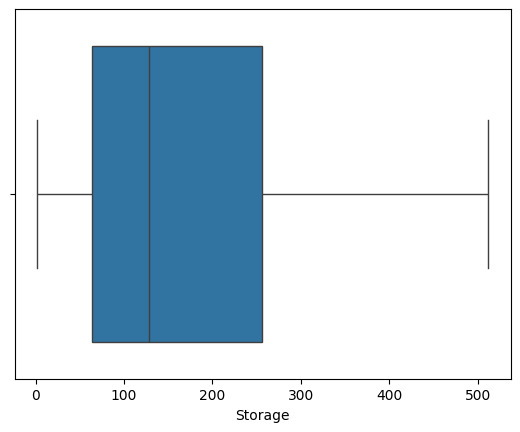

In [104]:

sns.boxplot(x='Storage',data=df)
print('after removing outliers')

Data Visulaztion

In [145]:
number_of_sld_brd = df.groupby("Brand").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)
number_of_sld_brd

,Brand,count
29,Samsung,450
35,Xiaomi,347
1,Apple,291
27,Realme,116
23,OPPO,92
25,POCO,67
15,Huawei,57
20,Motorola,55
32,TCL,36
7,Cubot,33


In [106]:
df.sample()

,Brand,Model,RAM,Storage,Color,Final Price,None,<function remove_outliers at 0x000002802C5F07C0>
386,Samsung,Galaxy S22,12.0,256.0,Black,1647.19,NaN,NaN


In [146]:
top_5 = number_of_sld_brd[0:6]

top_5


,Brand,count
29,Samsung,450
35,Xiaomi,347
1,Apple,291
27,Realme,116
23,OPPO,92
25,POCO,67


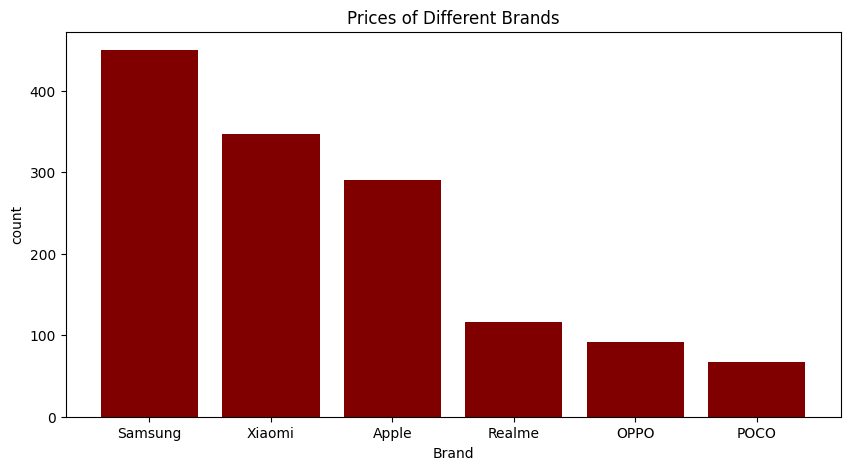

In [165]:


# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5['Brand'],top_5['count'], color='maroon')

# Add title and labels
plt.title('Prices of Different Brands')
plt.xlabel('Brand')
plt.ylabel('count')

# Show the plot
plt.show()


Corelation between RAM and Final price

In [168]:
df[['RAM','Final Price']].corr()

,RAM,Final Price
RAM,1.000000,0.445883
Final Price,0.445883,1.000000


Positive Correlation (0.445883): This indicates a moderate positive correlation between 'RAM' and 'Final Price'. As the RAM increases, the price tends to increase, but it's not a very strong correlation.


(0.0, 2064.427)

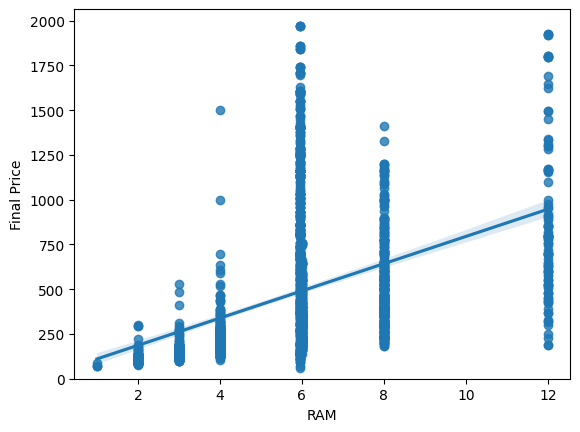

In [172]:
sns.regplot(x='RAM',y='Final Price',data=df)
plt.ylim(0,)

Correlation Between Storage and  final price

In [173]:
df[['Storage','Final Price']].corr()

,Storage,Final Price
Storage,1.00000,0.67083
Final Price,0.67083,1.00000


Positive Correlation (0.67083): There is a strong positive correlation between 'Storage' and 'Final Price'. As the storage capacity increases, the final price tends to increase as well. 

(0.0, 2016.0535)

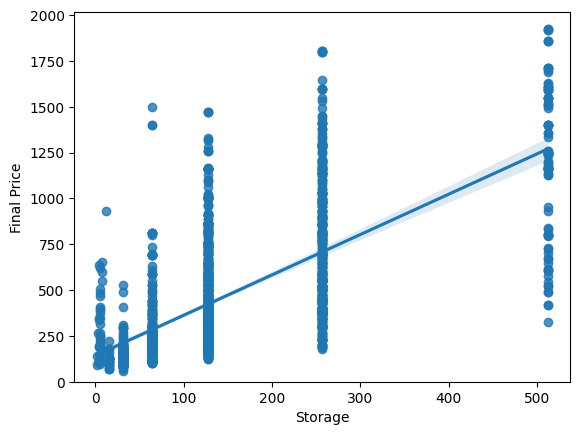

In [174]:
sns.regplot(x='Storage',y='Final Price',data=df)
plt.ylim(0,)

In [177]:
number_of_sld_model = df.groupby("Model").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)

top_10_model = number_of_sld_model[0:11]


C:\Users\hi! SONY\AppData\Local\Temp\ipykernel_11396\1280038385.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




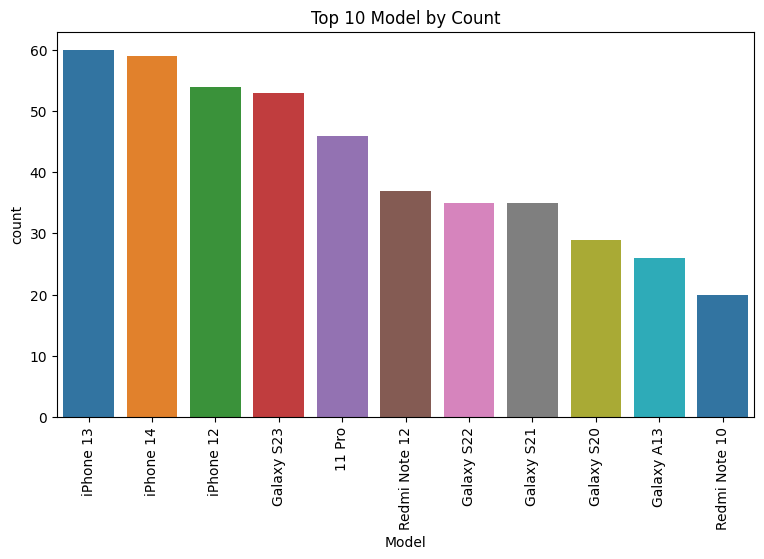

In [180]:
plt.figure(figsize=(9, 5))

sns.barplot(x="Model", y="count", data=top_10_model,palette="tab10")            

plt.title("Top 10 Model by Count")

plt.xticks(rotation=90)

plt.show()

In [189]:
colors = df.groupby("Color").count().iloc[:,1].reset_index(name = "count").sort_values(by="count",ascending=False)

C:\Users\hi! SONY\AppData\Local\Temp\ipykernel_11396\778403021.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




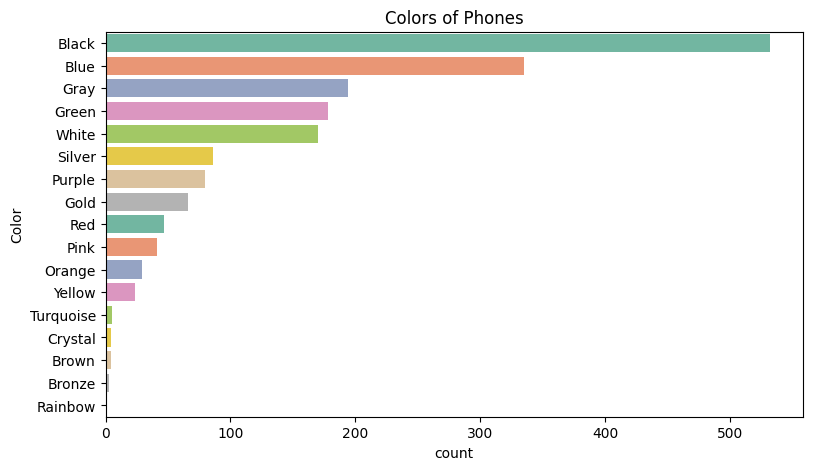

In [191]:
plt.figure(figsize=(9,5))

sns.barplot(x="count",y="Color",data=colors, palette = "Set2")

plt.title("Colors of Phones")

plt.show()

In [192]:
top_3colors=colors[0:3]
top_3colors

,Color,count
0,Black,532
1,Blue,335
6,Gray,194


In [193]:
df.sample()

,Brand,Model,RAM,Storage,Color,Final Price,None,<function remove_outliers at 0x000002802C5F07C0>
862,OPPO,X3,12.0,256.0,Silver,819.0,NaN,NaN


In [196]:
brand_model_counts = df.groupby(['Brand', 'Model']).size().reset_index(name='count').sort_values(by="count",ascending=False)
brand_model_counts


,Brand,Model,count
7,Apple,iPhone 13,60
8,Apple,iPhone 14,59
6,Apple,iPhone 12,54
292,Samsung,Galaxy S23,53
399,Xiaomi,Redmi Note 12,37
...,...,...,...
101,Huawei,Nova 9,1
253,Samsung,Galaxy A03,1
252,Samsung,A90,1
98,Huawei,Mate 30,1


In [198]:
top_10=brand_model_counts[0:10]
top_10

,Brand,Model,count
7,Apple,iPhone 13,60
8,Apple,iPhone 14,59
6,Apple,iPhone 12,54
292,Samsung,Galaxy S23,53
399,Xiaomi,Redmi Note 12,37
290,Samsung,Galaxy S21,35
291,Samsung,Galaxy S22,35
289,Samsung,Galaxy S20,29
257,Samsung,Galaxy A13,26
357,Xiaomi,11 Pro,22


In [200]:
df.to_csv("Phone_sales_data.csv")

                                                                   THANK YOU